# Загрузка таблиц и выполнение 1 этапа

In [1]:
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
from pandas.core.groupby.groupby import DataError
%matplotlib inline

In [2]:
class BaseGraph(object):
    
    def __init__(self, 
                 df, # датафрейм / csv
                 title='plot', # название графика
                 xlabel=None, # название оси x
                 ylabel=None, # название оси y, по умолчанию оси получают названия переменных
                 style='whitegrid', # стиль графика
                 plot_width=15, # ширина графика
                 plot_height=4, # высота графика
                 font_scale=1): # размер шрифта
    
        self.df = df if type(df) == pd.DataFrame else pd.read_csv(df)
        self.title = title
        self.names_of_columns = self.get_digit_columns()
        self.xlabel = self.names_of_columns[0] if xlabel is None else self.xlabel
        self.ylabel = self.names_of_columns[1] if xlabel is None else self.ylabel
        sns.set(
            style=style,
            font_scale=font_scale,
            rc={'figure.figsize': (plot_width, plot_height)}
        )

    
    
    def plot(self, 
             col1=None, # можно передать название колонок, которые необходимо визуализировать. 
             col2=None): # По умолчанию -- первые встретившиеся цифры
        col1 = self.names_of_columns[0] if col1 is None else col1
        col2 = self.names_of_columns[1] if col2 is None else col2
        try:
            ax = sns.lineplot(self.df[col1], self.df[col2])
            ax.set_ylabel(col2)
            ax.set_xlabel(col1)
            ax.set_title(self.title)
            return ax
        except DataError or ValueError:
            print('Неверный формат данных')
            plt.close()
        
    
    def get_digit_columns(self): # метод, который находит предположительные колонки для визуализации
        names_of_columns = list()
        for i in self.df:
            if str(self.df[i][0]).replace('.', '').isdigit():
                names_of_columns.append(i)
                if len(names_of_columns) >= 2:
                    break
        return names_of_columns
    
class BarGraph(BaseGraph):
    
    
    def __init__(self, df, title='plot', xlabel=None, ylabel=None, style='whitegrid', plot_width=15,
                 plot_height=4, font_scale=1):
        super().__init__(df, title='plot', xlabel=None, ylabel=None, style='whitegrid', plot_width=15,
                 plot_height=4, font_scale=1)
    
    def plot(self, col1=None, col2=None):
        col1 = self.names_of_columns[0] if col1 is None else col1
        col2 = self.names_of_columns[1] if col2 is None else col2
        
        try:
            df_for_bar = self.df.sort_values(col1, ascending=False) \
            .head(100) if self.df[col1].shape[0] > 100 else self.df # попытка сделать график читаемым
            ax = sns.barplot(df_for_bar[col1], df_for_bar[col2])
            if self.df[col1].shape[0] > 7:
                ax.set_xticklabels(self.df[col1], rotation=45)
        
            
            ax.set_ylabel(col2)
            ax.set_xlabel(col1)
            ax.set_title(self.title)
            return ax
        except ValueError or DataError:
            print('Неверный формат данных')
            

# Проверка

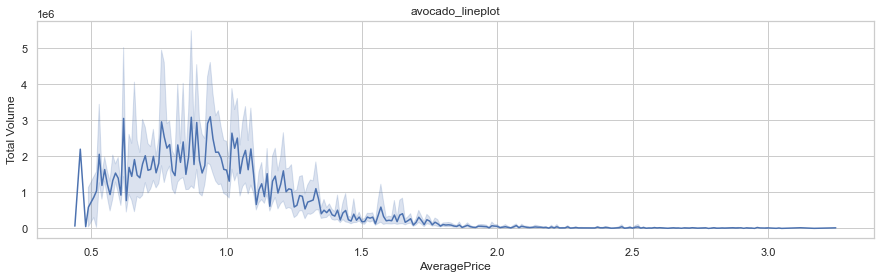

In [3]:
path = 'https://stepik.org/media/attachments/lesson/362453/avocado_full.csv'

base_graph = BaseGraph(path, title='avocado_lineplot')

base_graph.plot()

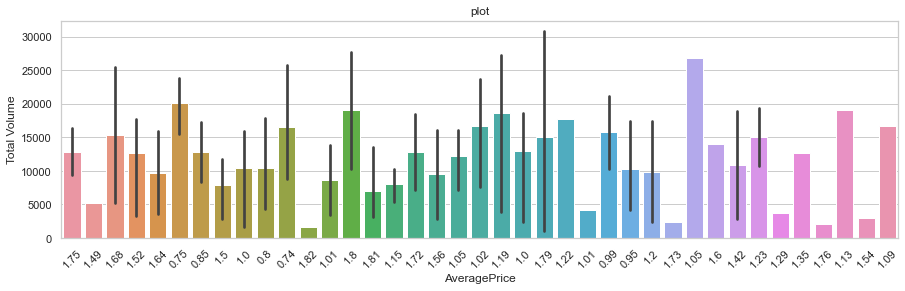

In [4]:
bar_graph = BarGraph(path, title='avocado_barplot')

bar_graph.plot()